# Neural Network to recognize handwritten digits 


- We will use the handwritten digits dataset used in Week 4 - logistic regression
- Use the CSV files that contain the pixel values 

## Load the 2D matrices in csv files.

In [2]:
import pandas as pd
import numpy as np

In [14]:
x_train = pd.read_csv('mnist_training.csv', header=None) 
x_test = pd.read_csv('mnist_testing.csv', header=None) 
y_train = pd.read_csv('mnist_train_class.csv', header=None) 
y_test =pd.read_csv('mnist_test_class.csv',header=None)

y_train=np.reshape(y_train,(60000,))
y_test=np.reshape(y_test,(10000,))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### Scaling Training and Testing data
If x_train and x_test are not already scaled between 0 and 1, scale it.

In [10]:
x_train1 = x_train/255
x_test1 = x_test/255
print(np.max(x_train1))
print(np.max(x_test1))
print(np.min(x_train1))
print(np.min(x_test1))

1.0
1.0
0.0
0.0


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

- Try different solver options if there is no convergence.
- Increase the tolerance value if optimization is not converging.

### Results of Neural network 

- Two hidden layers with 50 nodes and 50 nodes.
- early stopping
- No need to provide number of nodes in input layer and output layer. Automatically determined from x_train, and y_train.
- classification - softmax or sigmoid
- NN model achieves higher accuracy than logistic regression

In [13]:
nn_model = MLPClassifier (hidden_layer_sizes=(50,50),# two hidden layers
                                                 max_iter=200,
                                                 activation = 'relu',
                                                 solver='adam',batch_size=200,# mini batch
                                                 n_iter_no_change=10,
                                                 early_stopping=True) #early stopping

nn_model.fit(x_train1,y_train)
nn_model.predict(x_test1)
print(accuracy_score(y_train,nn_model.predict(x_train1)))
print(accuracy_score(y_test,nn_model.predict(x_test1)))

/Users/soibamb/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9746833333333333
0.9626


### Exploring the weights of the NN model

In [17]:
print("weights in the model ")
for i in range(0,len(nn_model.coefs_)):
    print(f"weights between layer {i} and layer {i+1}")
    print(nn_model.coefs_[i].shape)

print("bias/intercepts weights in the model")
for i in range(0,len(nn_model.intercepts_)):
    print(f"bias/intercepts weights between layer {i} and layer {i+1}")
    print(nn_model.intercepts_[i].shape)

weights in the model 
weights between layer 0 and layer 1
(784, 50)
weights between layer 1 and layer 2
(50, 50)
weights between layer 2 and layer 3
(50, 10)
bias/intercepts weights in the model
bias/intercepts weights between layer 0 and layer 1
(50,)
bias/intercepts weights between layer 1 and layer 2
(50,)
bias/intercepts weights between layer 2 and layer 3
(10,)


### Plot accuracy vs iteration

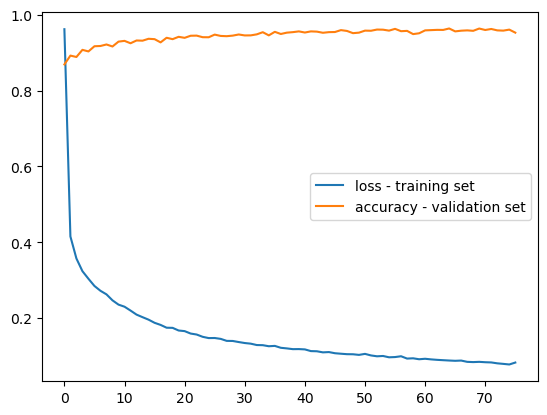

In [22]:
from matplotlib import pyplot as plt
plt.plot(nn_model.loss_curve_,label='loss - training set')
plt.plot(nn_model.validation_scores_,label='accuracy - validation set')
plt.legend()